In [52]:
import cv2
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [41]:
# read image
im = cv2.imread("data/img.png")
# resize image
newHeight = 200
newWidth = int(im.shape[1]*200/im.shape[0])
im = cv2.resize(im, (newWidth, newHeight))

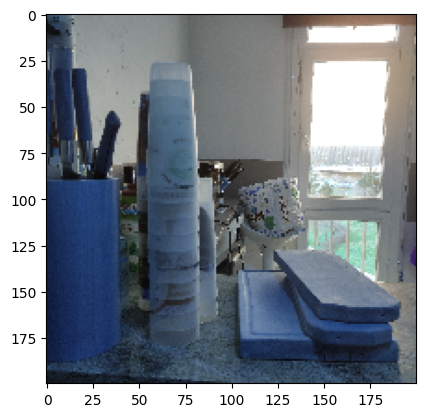

In [42]:
plt.imshow(im)

In [43]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(im)

In [44]:
# quality selector
# ss.switchToSelectiveSearchFast()
ss.switchToSelectiveSearchQuality()

In [45]:
rects = ss.process()
print('Total Number of Region Proposals: {}'.format(len(rects)))

Total Number of Region Proposals: 1522


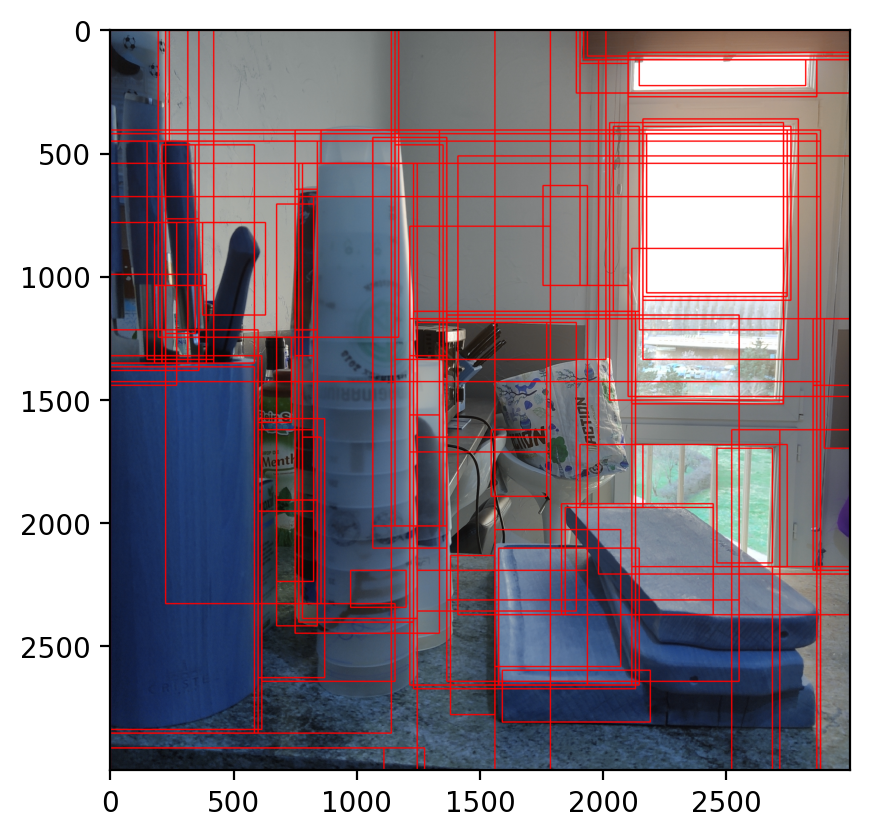

In [53]:
# show the image with the selected regions
imOut = cv2.imread("data/img.png")
# itereate over all the region proposals
for i, rect in enumerate(rects):
    # draw rectangle for region proposal till 100
    if (i < 100):
        x, y, w, h = rect
        x, y, w, h = x*15, y*15, w*15, h*15
        cv2.rectangle(imOut, (x, y), (x+w, y+h), (255, 0, 0), 3, cv2.LINE_AA)
    else:
        break

# show output
plt.imshow(imOut)

In [82]:
def possible_objects(img):
    #copy image
    imOut = img.copy()
    # resize image
    newHeight = 200
    newWidth = int(imOut.shape[1]*200/imOut.shape[0])
    imOut = cv2.resize(imOut, (newWidth, newHeight))
    # create Selective Search Segmentation Object using default parameters
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    # set input image on which we will run segmentation
    ss.setBaseImage(imOut)
    # Switch to slow but high recall Selective Search method
    # ss.switchToSelectiveSearchFast()
    ss.switchToSelectiveSearchQuality()
    # run selective search segmentation on input image
    rects = ss.process()
    # multiply the coordinates of the bounding boxes by the scale factor
    scale_factor_x = img.shape[1]/imOut.shape[1]
    scale_factor_y = img.shape[0]/imOut.shape[0]
    # create list of bboxes
    bboxes = []
    # iterate over all the region proposals
    for i, rect in enumerate(rects):
        # draw rectangle for region proposal
        x, y, w, h = rect
        x, y, w, h = round(x*scale_factor_x), round(y*scale_factor_y), round(w*scale_factor_x), round(h*scale_factor_y)
        bboxes.append([x, y, w, h])
    return bboxes

def show_boxes(img, boxes):
    # copy image
    imOut = img.copy()
    # iterate over all the region proposals
    for rect in boxes:
        # draw rectangle for region proposal till 100
        x, y, w, h = rect
        cv2.rectangle(imOut, (x, y), (x+w, y+h), (255, 0, 0), 3, cv2.LINE_AA)
    # show output
    plt.imshow(imOut)

In [83]:
# show_boxes(im, )
boxes = possible_objects(cv2.imread("data/img.png"))

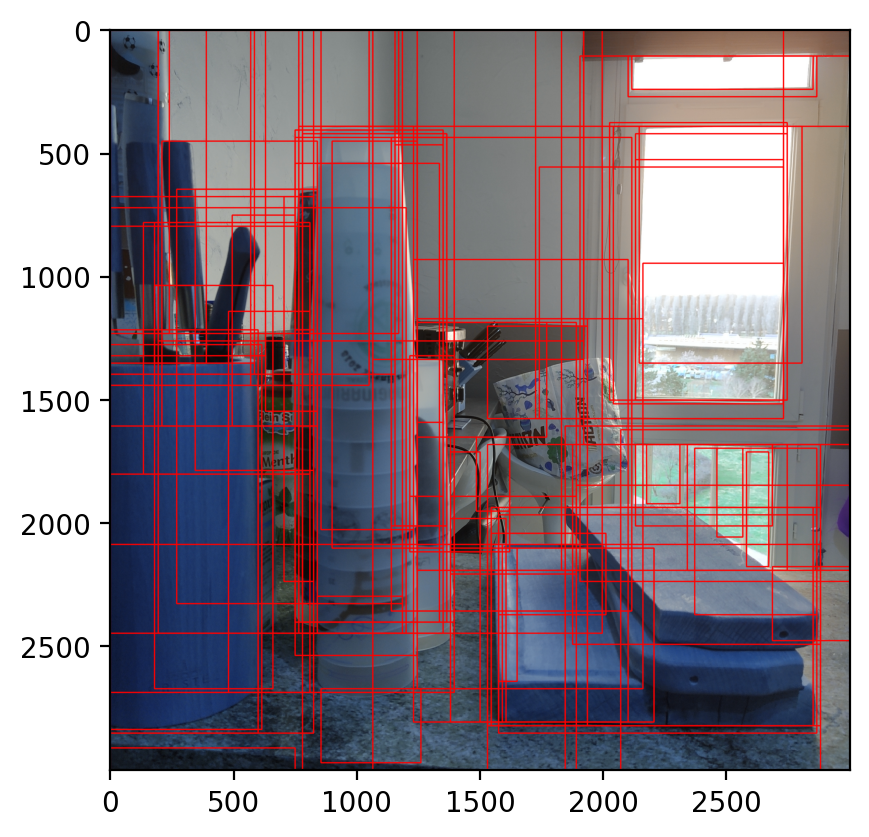

In [93]:
show_boxes(cv2.imread("data/img.png"), boxes[600:700])